In [1]:
#For reading the .csv file from the respective location
import os
os.chdir("D:/Avinash/applied_AI/Module 2-exploratory analysis")

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
hb=pd.read_csv("haberman.csv") #reading the dataset using pandas library

Objective: Here the objective is to find out based on patient data in terms of age, year of operation and no.of axillary nodes, whether they can survive for 5 years and longer(status=1) or less than 5 years(status=2)

In [5]:
hb.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
hb.shape

(306, 4)

There are 306 rows and 4 columns

In [7]:
hb["nodes"].value_counts() #count of no.of positive axillary  nodes

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [8]:
hb["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

From the above results it is understood that 225 people survived 5 years or longer and 81 people died within 5years. The datatype of "status" should not be "int".


In [9]:
hb.isna()

,age,year,nodes,status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False
304,False,False,False,False


There are no null/missing data in the dataset

Text(0.5, 1.0, 'status vs nodes')

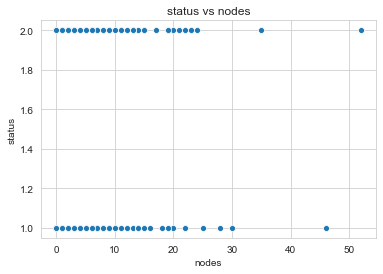

In [27]:
sns.scatterplot(x="nodes",y="status",data=hb).set_title("status vs nodes")

Not much can be interpreted from this plot.

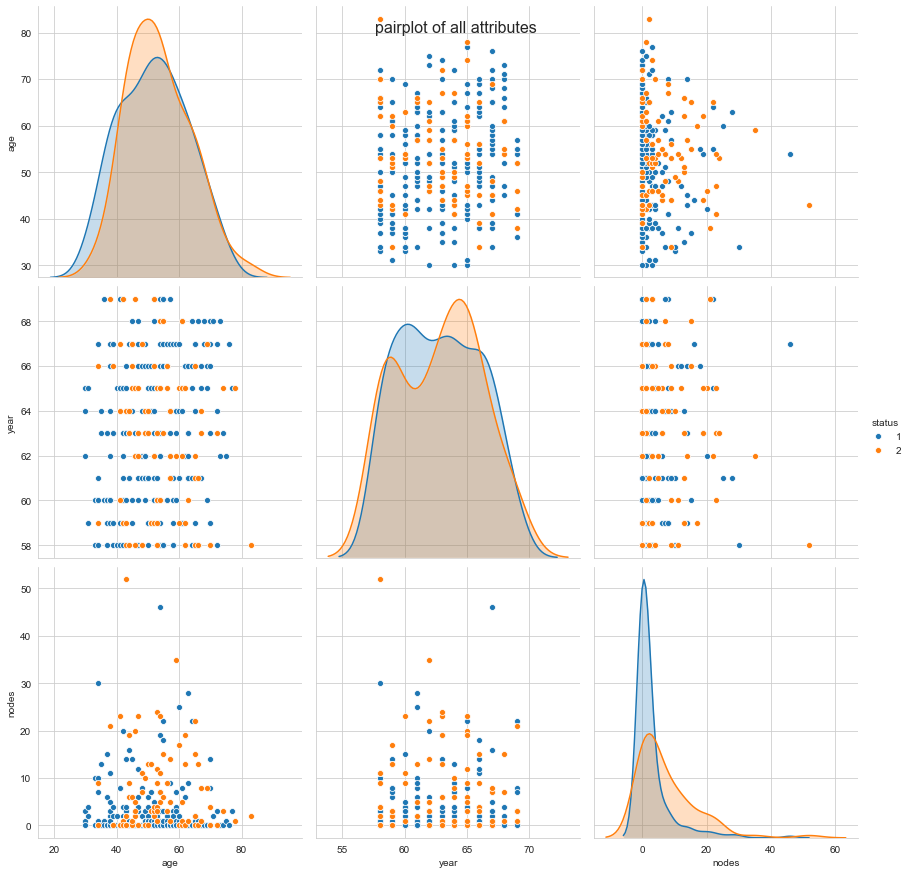

In [33]:
sns.set_style("whitegrid")
ax=sns.pairplot(data=hb,hue="status",height=4)
ax.fig.suptitle("pairplot of all attributes",fontsize=16)
plt.show()

here we can see a lot of overlap of data pertaining to data of different features.Hence it is difficult to classify as to which of the features are relevant in determining the probable "status"

D:\Avinash\python_setup\files\envs\tf\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


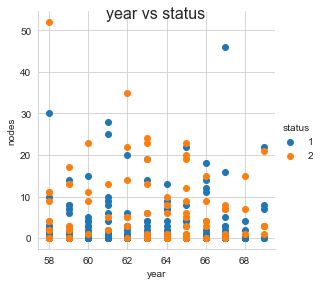

In [36]:
g=sns.FacetGrid(hb, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend()
g.fig.suptitle("year vs status",fontsize=16)
plt.show()

In [13]:
status_1= hb.loc[hb["status"]==1]
status_2=hb.loc[hb["status"]==2]

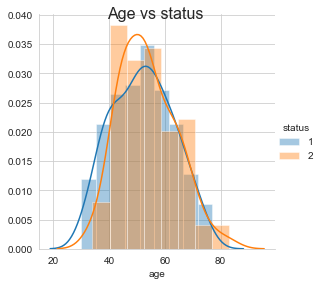

In [32]:
g=sns.FacetGrid(hb,hue="status",height=4).map(sns.distplot,"age").add_legend()
g.fig.suptitle("Age vs status",fontsize=16)
plt.show()

1) here there is almost complete overlap between the categories status 1 and 2
2) people of age group 35-40 are more likely to survive, for the age 40-70 chances of survival can go bothways
3) people of age group 75 and beyond 80 years, the chances of survival are low

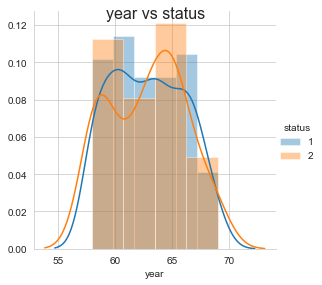

In [34]:
g=sns.FacetGrid(hb,hue="status",height=4).map(sns.distplot,"year").add_legend()
g.fig.suptitle("year vs status",fontsize=16)
plt.show()

the year of operation does not seem have any correlation to the survival of the patient

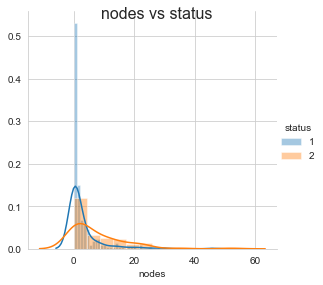

In [35]:
g=sns.FacetGrid(hb,hue="status",height=4).map(sns.distplot,"nodes").add_legend()
g.fig.suptitle("nodes vs status",fontsize=16)
plt.show()

1) According to the graph, there seems to be negative numbers for nodes, this is not clear why?
2) Considering only the positive number of nodes, patients with 0-5 nodes are more likely to survive, more than 5nodes, the chances of survival are less

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]


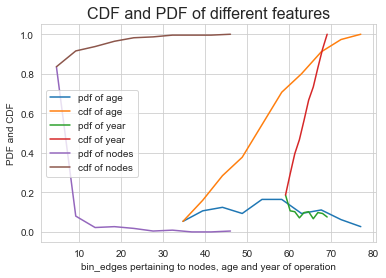

In [43]:
#plotting of PDF and CDF with regard to status_1 and other features
pdf,bin_edges=np.histogram(status_1["age"],density=False,bins=10)
#print(pdf)
#print(bin_edges)
norm_pdf=pdf/(sum(pdf))
print(norm_pdf) #normalized pdf to interpret it in terms of percentage
cdf=np.cumsum(norm_pdf)
print(cdf)
plt.plot(bin_edges[1:],norm_pdf,label="pdf of age")
plt.plot(bin_edges[1:],cdf,label="cdf of age")

pdf,bin_edges=np.histogram(status_1["year"],density=False,bins=10)
norm_pdf=pdf/(sum(pdf))
cdf=np.cumsum(norm_pdf)
plt.plot(bin_edges[1:],norm_pdf,label="pdf of year")
plt.plot(bin_edges[1:],cdf,label="cdf of year")

pdf,bin_edges=np.histogram(status_1["nodes"],density=False,bins=10)
norm_pdf=pdf/(sum(pdf))
cdf=np.cumsum(norm_pdf)
plt.plot(bin_edges[1:],norm_pdf,label="pdf of nodes")
plt.plot(bin_edges[1:],cdf,label="cdf of nodes")

plt.xlabel("bin_edges pertaining to nodes, age and year of operation")
plt.ylabel("PDF and CDF")
plt.title("CDF and PDF of different features",fontsize=16)
plt.legend()
plt.show()

Age
1) Roughly 18% of the people are in the range of 50-60years of age(PDF dist blue line)
2) 98% of the people have age less than or equal to 70 years(CDF dist-orange line)
Nodes
3) 82% of people have less than 5 axillry nodes (PDF dist- purple line)
4) almost 100% of people have less than or equal to 40 nodes(CDF dist-grey line)
year of operation
5) 20% of the people had got operated before the year 1960(PDF dis- green line)

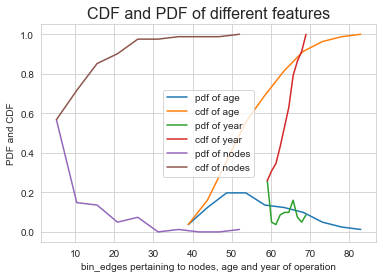

In [45]:
#plotting of PDF and CDF with regard to status_2 and other features
pdf,bin_edges=np.histogram(status_2["age"],density=False,bins=10)
norm_pdf=pdf/(sum(pdf))
cdf=np.cumsum(norm_pdf)
plt.plot(bin_edges[1:],norm_pdf,label="pdf of age")
plt.plot(bin_edges[1:],cdf,label="cdf of age")

pdf,bin_edges=np.histogram(status_2["year"],density=False,bins=10)
norm_pdf=pdf/(sum(pdf))
cdf=np.cumsum(norm_pdf)
plt.plot(bin_edges[1:],norm_pdf,label="pdf of year")
plt.plot(bin_edges[1:],cdf,label="cdf of year")

pdf,bin_edges=np.histogram(status_2["nodes"],density=False,bins=10)
norm_pdf=pdf/(sum(pdf))
cdf=np.cumsum(norm_pdf)
plt.plot(bin_edges[1:],norm_pdf,label="pdf of nodes")
plt.plot(bin_edges[1:],cdf,label="cdf of nodes")

plt.xlabel("bin_edges pertaining to nodes, age and year of operation")
plt.ylabel("PDF and CDF")
plt.title("CDF and PDF of different features",fontsize=16)
plt.legend()
plt.show()

Age
1)20% of the people are in the range of 50-55 years of age(PDF dist-blue line)
2)95% of people have age less than on equal to 70 years(CDF dist-orange line)
Node
3)Roughly 60% of people have less than 10 axillary nodes(PDF dist- purple line)
4)100% of people have less than or equal to 50 nodes(CDF dist- grey line)
5)85% of people have less than or equal to 15 nodes(CDF dist-grey line)
year of operation
6)22% of people had their operation before 1960(PDF dist- green line)

In [19]:
#Mean and standard deviation for features in each category "status_1" and "status_2"
# Here the features nodes and age has been selected for obtaining these values
#Status_1
print("Mean for age-status_1 ",np.mean(status_1["age"]))
print("Mean for nodes-status_1 ", np.mean(status_1["nodes"]))
print("spread of age-status_1 ",np.std(status_1["age"]))
print("Spread of nodes-status_1 ", np.std(status_1["nodes"]))

#status_2
print("Mean for age-status_2 ",np.mean(status_2["age"]))
print("Mean for nodes-status_2 ", np.mean(status_2["nodes"]))
print("spread of age-status_2 ",np.std(status_2["age"]))
print("Spread of nodes-status_2 ", np.std(status_2["nodes"]))

Mean for age-status_1  52.01777777777778
Mean for nodes-status_1  2.7911111111111113
spread of age-status_1  10.987655475100508
Spread of nodes-status_1  5.857258449412138
Mean for age-status_2  53.67901234567901
Mean for nodes-status_2  7.45679012345679
spread of age-status_2  10.104182193031312
Spread of nodes-status_2  9.128776076761635


From the above output it can be observed that mean number and standard deviation pertaining to the no.of nodes for patients with status_2 is much higher than that of status_1.

In [20]:
#Median values of features with status=1
print("Median of age of patients with status=1 ",np.median(np.sort(status_1["age"])))
print("Median of year of operation of patients with status=1 ",np.median(np.sort(status_1["year"])))
print("Median of no.of axillary nodes in patients with status=1 ",np.median(np.sort(status_1["nodes"])))

#Median values of features with status=2
print("Median of age of patients with status=2 ",np.median(np.sort(status_2["age"])))
print("Median of year of operation of patients with status=2 ",np.median(np.sort(status_2["year"])))
print("Median of no.of axillary nodes in patients with status=2 ",np.median(np.sort(status_2["nodes"])))

Median of age of patients with status=1  52.0
Median of year of operation of patients with status=1  63.0
Median of no.of axillary nodes in patients with status=1  0.0
Median of age of patients with status=2  53.0
Median of year of operation of patients with status=2  63.0
Median of no.of axillary nodes in patients with status=2  4.0


In [21]:
# percentile values of features with status=1
print(" percentiles of age for patients with status=1 are ",np.percentile(status_1["age"],np.arange(0,100,25)))
print(" percentiles of year of operation for patients with status=1 are ",np.percentile(status_1["year"],np.arange(0,100,25)))
print(" percentiles of no.of nodes for patients with status=1 are ",np.percentile(status_1["nodes"],np.arange(0,100,25)))

# percentile values of features with status=2
print(" percentiles of age for patients with status=2 are ",np.percentile(status_2["age"],np.arange(0,100,25)))
print(" percentiles of year of operation for patients with status=2 are ",np.percentile(status_2["year"],np.arange(0,100,25)))
print(" percentiles of no.of nodes for patients with status=2 are ",np.percentile(status_2["nodes"],np.arange(0,100,25)))

 percentiles of age for patients with status=1 are  [30. 43. 52. 60.]
 percentiles of year of operation for patients with status=1 are  [58. 60. 63. 66.]
 percentiles of no.of nodes for patients with status=1 are  [0. 0. 0. 3.]
 percentiles of age for patients with status=2 are  [34. 46. 53. 61.]
 percentiles of year of operation for patients with status=2 are  [58. 59. 63. 65.]
 percentiles of no.of nodes for patients with status=2 are  [ 0.  1.  4. 11.]


From the above results it can be observed that 75% patients with status=1 have less than or equal to zero axillary nodes. In case of patients in the group status=2, 75% of patients have less than or equal to 4 nodes. The no.of axillary nodes is probably the prominent factor determining the survival of patients.

In [22]:
#90th percentile for the features age and nodes
print(" 90th percentile of age for patients with status=1 are ",np.percentile(status_1["age"],90))
print(" 90th percentile of no.of nodes for patients with status=1 are ",np.percentile(status_1["nodes"],90))
print(" 90th percentile of age for patients with status=2 are ",np.percentile(status_2["age"],90))
print(" 90th percentile of age for patients with status=2 are ",np.percentile(status_2["nodes"],90))

 90th percentile of age for patients with status=1 are  67.0
 90th percentile of no.of nodes for patients with status=1 are  8.0
 90th percentile of age for patients with status=2 are  67.0
 90th percentile of age for patients with status=2 are  20.0


90% of people in status=1 group have less than on equal to 8 axillary nodes. However in group status=2, 90% of patients have less than or equal to 20 axillary nodes.

Text(0.5, 1.0, 'box plot of nodes vs status')

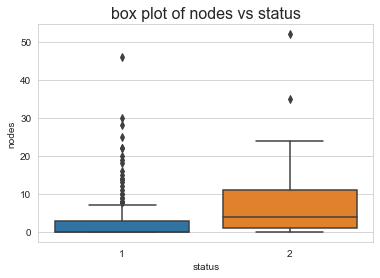

In [48]:
#Box plot
sns.boxplot(x='status',y='nodes', data=hb).set_title("box plot of nodes vs status",fontsize=16)

Here it can be said that patients with more than 5 axillary nodes have lesser chances of surviving beyond 5 years.

Text(0.5, 1.0, 'nodes vs status')

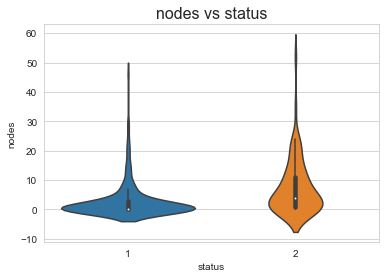

In [47]:
#Violin plot
sns.violinplot(x='status',y="nodes", data=hb,size=8).set_title("nodes vs status",fontsize=16)

In [25]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [26]:
conda install -c conda-forge/label/cf202003 miktex


Note: you may need to restart the kernel to use updated packages.
